<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Exploring Data to understand features and target variables**

In [1]:
#importing libraries to be used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
import warnings
from sklearn.linear_model import Lasso,Ridge


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading data
data = pd.read_csv("/content/drive/MyDrive/Almabetter/Bike Sharing Demand Prediction - Sakshi Dhyani/SeoulBikeData.csv",encoding= 'unicode_escape')

In [4]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
data.shape

(8760, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#column names
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# checking null values

data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**No need to remove null values as null values do not even exist**

In [9]:
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [10]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [11]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [12]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

**Plotting Bar graphs to visualize total rental bike count vs different feature values**

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64


Text(0.5, 1.0, 'Rented Bike sum vs Seasons')

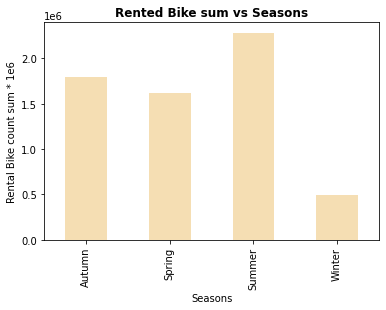

In [13]:
# Total count of Rented bike count for different seasons
print(data.groupby(['Seasons'])['Rented Bike Count'].sum())
data.groupby(['Seasons'])['Rented Bike Count'].sum().plot(kind="bar",color='wheat')
plt.ylabel("Rental Bike count sum * 1e6")
plt.title("Rented Bike sum vs Seasons",fontweight="bold")


**In Summer season there is high count of rented bikes**

Rental Bike Count for days on which there is a holiday: 499.75694444444446
Rental Bike Count for days on which there is no holiday: 715.2280259365995
Average Rented Bike count


Text(0.5, 1.0, 'Average Rental Bike Count for Holiday or No Holiday')

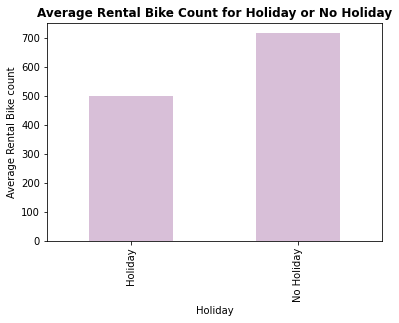

In [14]:
# Average Rented Bike count for different days depending on whether that day is a holiday or not

print("Rental Bike Count for days on which there is a holiday:",data[data['Holiday'] == 'Holiday']['Rented Bike Count'].mean())
print("Rental Bike Count for days on which there is no holiday:",data[data['Holiday'] == 'No Holiday']['Rented Bike Count'].mean())
print("Average Rented Bike count")
data.groupby(['Holiday'])['Rented Bike Count'].mean().plot(kind="bar",color='thistle')
plt.ylabel("Average Rental Bike count")
plt.title("Average Rental Bike Count for Holiday or No Holiday",fontweight="bold")

**In Non-holidays, average rented bike count is high. That indicates people use high number of rented bike while going to work**

**Plotting line graph to plot Average rented bike count Vs different feature values**

In [15]:
# Defining function to check plots for different columns

def simple_plot(col_name):
  data.groupby([col_name])['Rented Bike Count'].mean().plot(kind="line",color='orange')
  plt.ylabel("Average of Rented Bike count")
  plt.title("{} Vs Average Rented Bike Count".format(col_name),fontweight="bold")
 

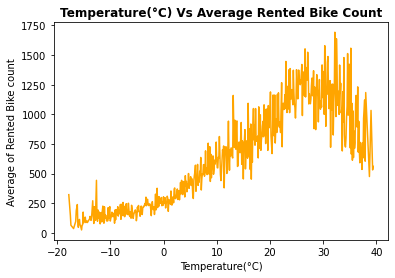

In [16]:
# Average Rented Bike count for various temperatures
simple_plot("Temperature(°C)")


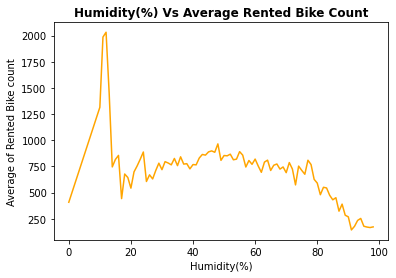

In [17]:
# Average Rented Bike count for various Humidity
simple_plot("Humidity(%)")

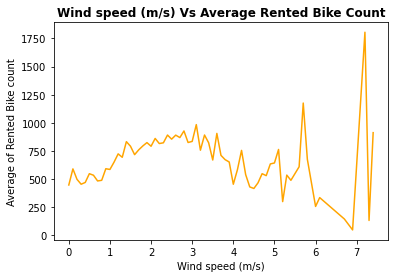

In [18]:
# Average Rented Bike count for different wind speed values
simple_plot("Wind speed (m/s)")

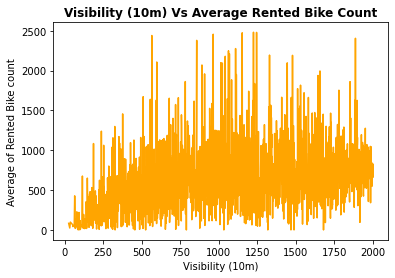

In [19]:
# Average Rented Bike count for different visibility values
simple_plot("Visibility (10m)")

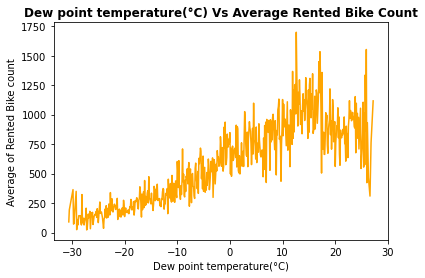

In [20]:
# average Rented Bike count for different dew point temperatures

simple_plot("Dew point temperature(°C)")

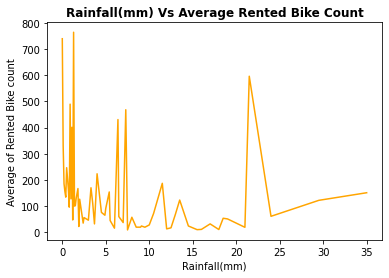

In [21]:
# average Rented Bike count for different rainfall feature

simple_plot("Rainfall(mm)")


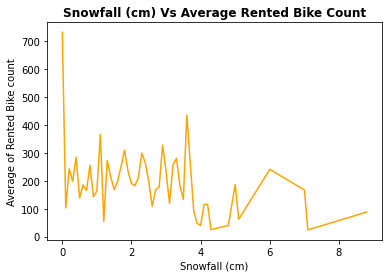

In [22]:
# average Rented Bike count for different snowfall feature

simple_plot("Snowfall (cm)")

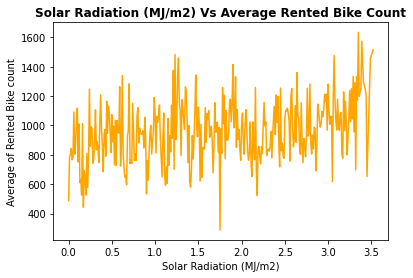

In [23]:
# average Rented Bike count for different solar radiation values
simple_plot("Solar Radiation (MJ/m2)")

**Visualization of different Features Distribution**

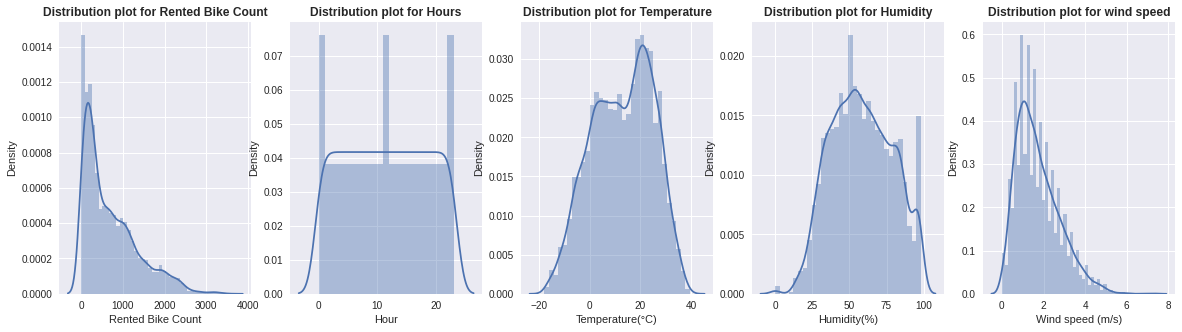

In [24]:
# using distplot to understand data distribution for various features

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
fig, ax = plt.subplots(1,5, figsize=(20,5))
sns.distplot(data['Rented Bike Count'],ax=ax[0])
sns.distplot(data['Hour'],ax=ax[1])
sns.distplot(data['Temperature(°C)'],ax=ax[2])
sns.distplot(data['Humidity(%)'],ax=ax[3])
sns.distplot(data['Wind speed (m/s)'],ax=ax[4])
ax[0].set_title("Distribution plot for Rented Bike Count",fontweight="bold")
ax[1].set_title("Distribution plot for Hours",fontweight="bold")
ax[2].set_title("Distribution plot for Temperature",fontweight="bold")
ax[3].set_title("Distribution plot for Humidity",fontweight="bold")
ax[4].set_title("Distribution plot for wind speed",fontweight="bold")
plt.show()

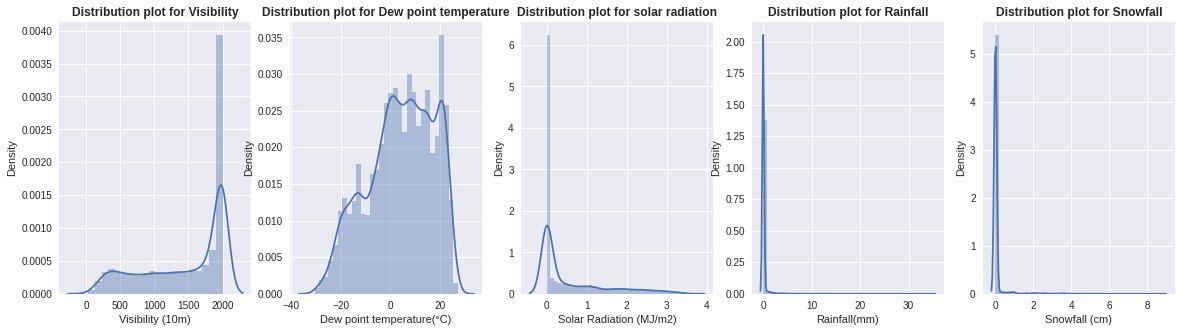

In [25]:
fig, ax = plt.subplots(1,5, figsize=(20,5))
sns.distplot(data['Visibility (10m)'],ax=ax[0])
sns.distplot(data['Dew point temperature(°C)'],ax=ax[1])
sns.distplot(data['Solar Radiation (MJ/m2)'],ax=ax[2])
sns.distplot(data['Rainfall(mm)'],ax=ax[3])
sns.distplot(data['Snowfall (cm)'],ax=ax[4])
ax[0].set_title("Distribution plot for Visibility",fontweight="bold")
ax[1].set_title("Distribution plot for Dew point temperature",fontweight="bold")
ax[2].set_title("Distribution plot for solar radiation",fontweight="bold")
ax[3].set_title("Distribution plot for Rainfall",fontweight="bold")
ax[4].set_title("Distribution plot for Snowfall",fontweight="bold")
plt.show()

In [26]:
# Converting string values of columns to numerical values

data.replace({'Holiday':{'No Holiday':0,'Holiday':1},'Seasons':{'Summer':3,'Spring':2,'Autumn':1,'Winter':0},'Functioning Day':{'Yes':1,'No':0}},inplace=True)


In [27]:
# Creating two more columns to store day of week and month separately using date column

data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")
data['weekday'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month
data.drop(columns='Date',inplace = True)

Text(0, 0.5, 'Total Rented Bike Count')

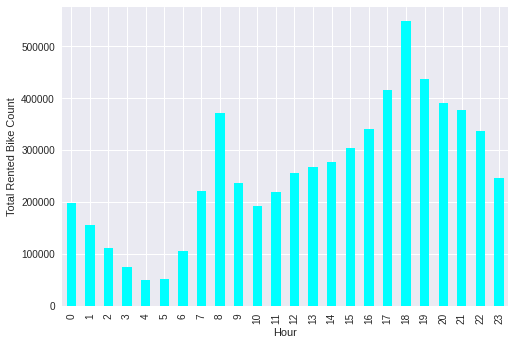

In [28]:
# Plotting graphs to get rented bike count for different hours

data.groupby(['Hour'])['Rented Bike Count'].sum().plot(kind="bar",color='cyan')
plt.ylabel("Total Rented Bike Count")

**Around morning or evening time, people travel to work or come back from work mostly. So maybe that is why rented bike count is high for those hours.**

Text(0, 0.5, 'Total Rented Bike Count')

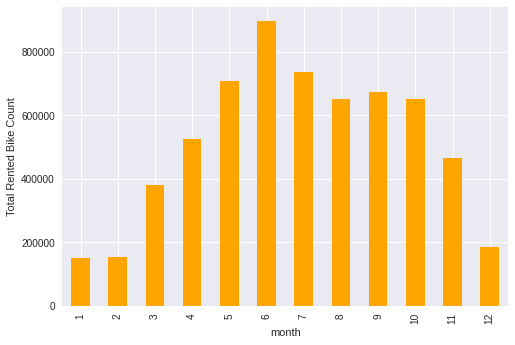

In [29]:
# Plotting graphs to get rented bike count for different months

data.groupby(['month'])['Rented Bike Count'].sum().plot(kind="bar",color='orange')
plt.ylabel("Total Rented Bike Count")

weekday
0    911743
1    858596
2    923956
3    861999
4    950334
5    885492
6    780194
Name: Rented Bike Count, dtype: int64


Text(0, 0.5, 'Total Rented Bike Count')

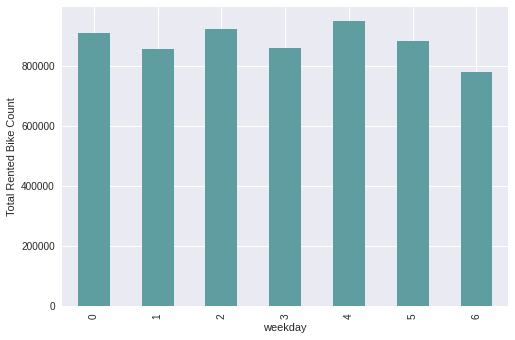

In [30]:
# Plotting graphs to get rented bike count for different weekdays
data.groupby(['weekday'])['Rented Bike Count'].sum().plot(kind="bar",color='cadetblue')
print(data.groupby(['weekday'])['Rented Bike Count'].sum())
plt.ylabel("Total Rented Bike Count")

**For sundays the rented bikes are used less as compared to other days**

**Visualizing Outliers for various features**

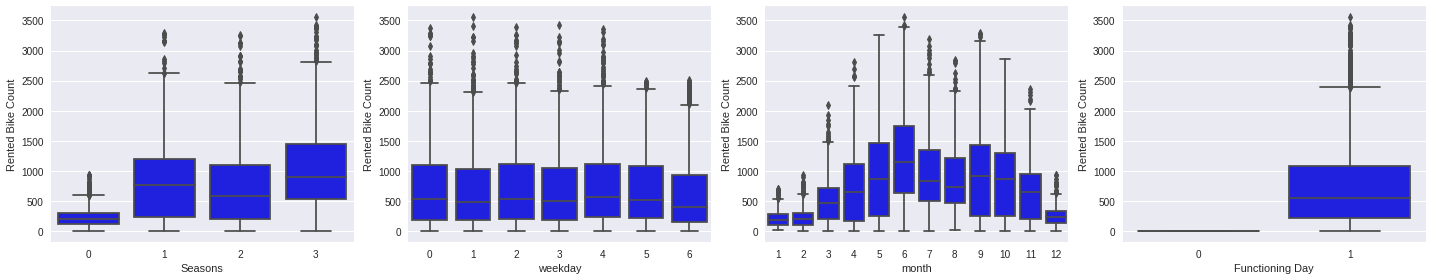

In [31]:
#Creating boxplot to visualize outliers present in features and target variable

def boxplotvar(column_name,ax_1):
  sns.boxplot(data=data,y="Rented Bike Count",x=column_name,orient="v",ax=ax_1,color = 'blue')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))
boxplotvar('Seasons',ax1)
boxplotvar('weekday',ax2)
boxplotvar('month',ax3)
boxplotvar('Functioning Day',ax4)
fig.tight_layout() 

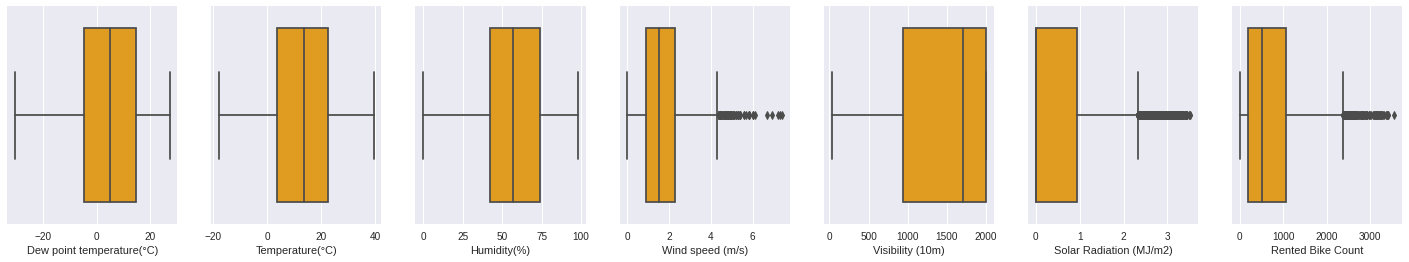

In [32]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(25,4))
sns.boxplot(x=data['Dew point temperature(°C)'],ax=ax1,color = 'orange')
sns.boxplot(x=data['Temperature(°C)'],ax=ax2,color = 'orange')
sns.boxplot(x=data['Humidity(%)'],ax=ax3,color = 'orange')
sns.boxplot(x=data['Wind speed (m/s)'],ax=ax4,color = 'orange')
sns.boxplot(x=data['Visibility (10m)'],ax=ax5,color = 'orange')
sns.boxplot(x=data['Solar Radiation (MJ/m2)'],ax=ax6,color = 'orange')
sns.boxplot(x=data['Rented Bike Count'],ax=ax7,color = 'orange')

**Not removing these outliers as sometimes removing outliers or replacing them causes significant data loss**

**Finding Relationship of dependent variable with other independent variables**

In [33]:
# defining function 

def relationship(column_name,ax_1):
  sns.scatterplot(x=column_name,y='Rented Bike Count',data=data,ax=ax_1,color = 'darkred')

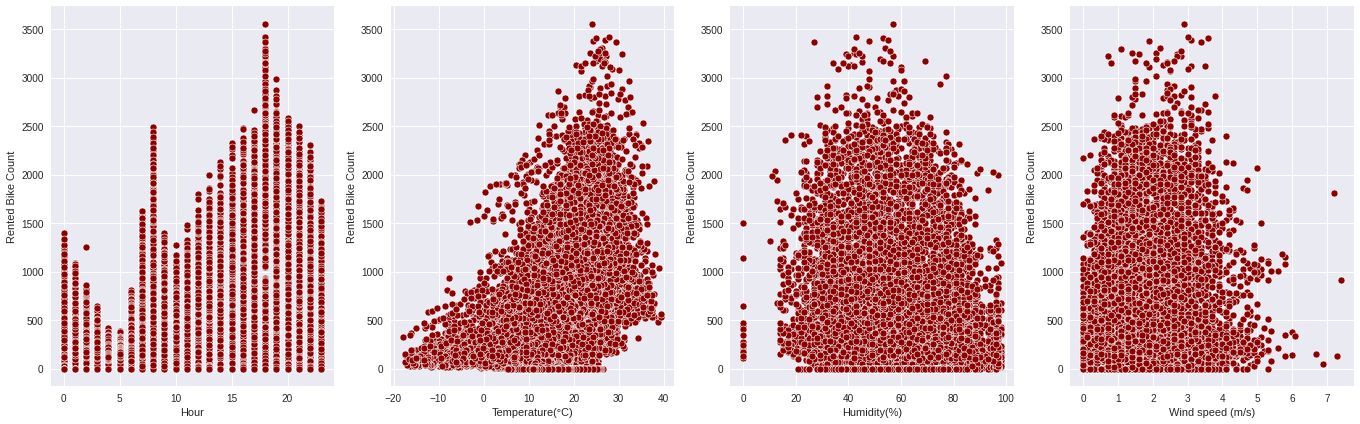

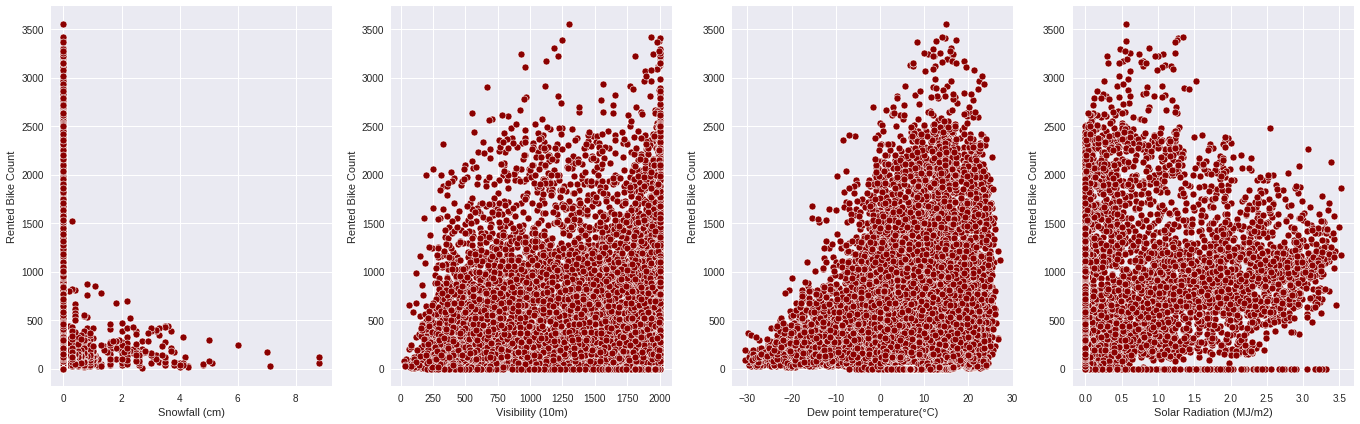

In [34]:
# plotting scatterplots to visualize different features relationship with target variable

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(19,6))
relationship('Hour',ax1)
relationship('Temperature(°C)',ax2)
relationship('Humidity(%)',ax3)
relationship('Wind speed (m/s)',ax4)
fig.tight_layout()
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(19,6))
relationship('Snowfall (cm)',ax1)
relationship('Visibility (10m)',ax2)
relationship('Dew point temperature(°C)',ax3)
relationship('Solar Radiation (MJ/m2)',ax4)
fig.tight_layout()


In [35]:
# defining array of independent variables

independent_variables = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month','weekday']

In [36]:
#defining array of dependent variable/target variable

dependent_variables =  ['Rented Bike Count']

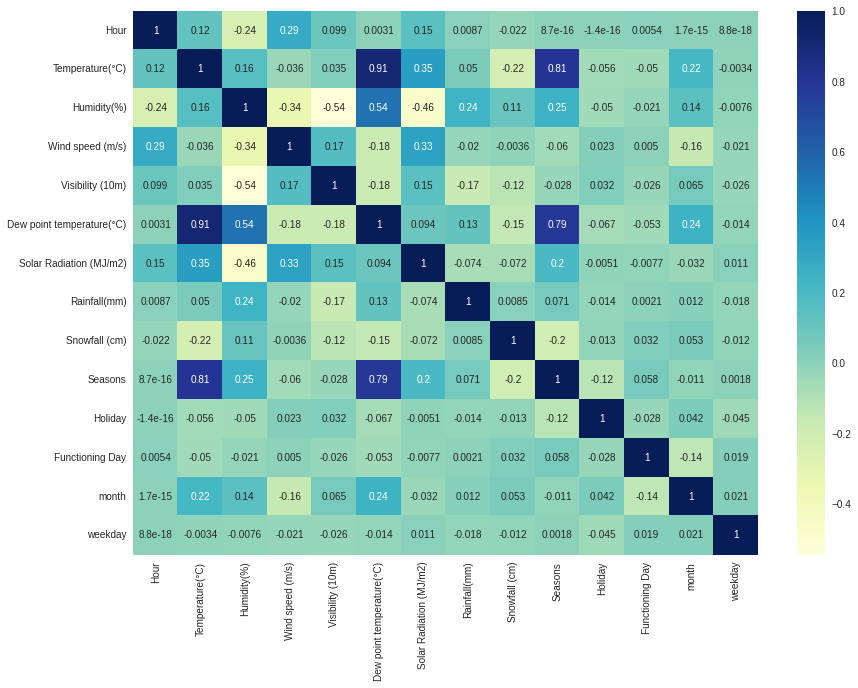

In [37]:
#finding correlation between various independent variables and plotting heatmap

correlation_calc = data[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [38]:
data_copy = data.copy()

**High correlation between :**



**1. Temperature and Seasons**


**2. Temperature and Dew Temperature**


**3. Dewpoint Temperature and seasons**


**4.Humidity and dew point temperature**

In [39]:
# Removing some columns from dataframe with high correlation

data.drop(columns='Dew point temperature(°C)',inplace =True)
data.drop(columns='Seasons',inplace =True)
data.drop(columns=["Humidity(%)"],inplace=True)

In [40]:

data.head()

Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0                254     0             -5.2               2.2   
1                204     1             -5.5               0.8   
2                173     2             -6.0               1.0   
3                107     3             -6.2               0.9   
4                 78     4             -6.0               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  weekday  month  
0        0                1        4     12  
1        0                1        4     12  
2        0                1        4     12  
3        0                1        4     12  
4        0                1        4     12

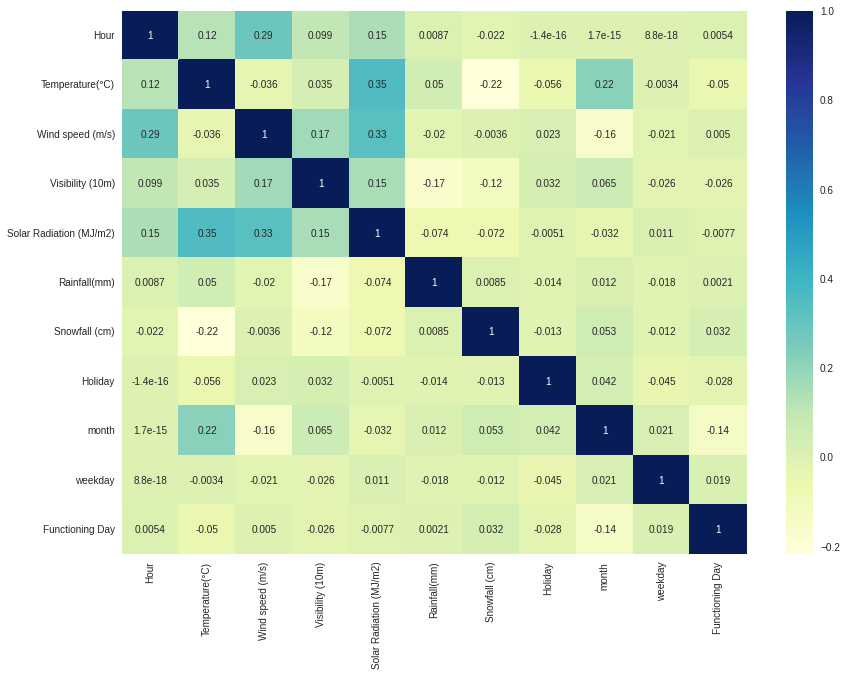

In [41]:
# plotting heatmap to understand correlation after removing some columns

independent_variables = ['Hour', 'Temperature(°C)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
       'Holiday', 'month','weekday','Functioning Day']
correlation_calc = data[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [42]:
# checking the correlation of variables with the target

df1Corr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("yellow", as_cmap=True))

In [43]:
# checking variance inflation factor for different variables

var_inf_factor = pd.DataFrame()
var_inf_factor["variables"] = data.columns
var_inf_factor["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
var_inf_factor

variables        VIF
0         Rented Bike Count   4.018821
1                      Hour   4.734048
2           Temperature(°C)   3.698636
3          Wind speed (m/s)   4.673095
4          Visibility (10m)   6.641089
5   Solar Radiation (MJ/m2)   1.928353
6              Rainfall(mm)   1.094609
7             Snowfall (cm)   1.115031
8                   Holiday   1.068699
9           Functioning Day  10.403906
10                  weekday   3.174993
11                    month   4.588648

In [44]:
# As VIF is greater than 10 for functioning day indicating very high multicollinerality, dropping this column from dataset

data.drop(columns=["Functioning Day"],inplace=True)



In [45]:
#defining function

def regplot(col_name,i):
  sns.regplot(x = col_name, y = "Rented Bike Count", data = data,ax=axs[i], x_estimator=np.mean,scatter_kws={"color": "plum"}, line_kws={"color": "darkmagenta"})
 

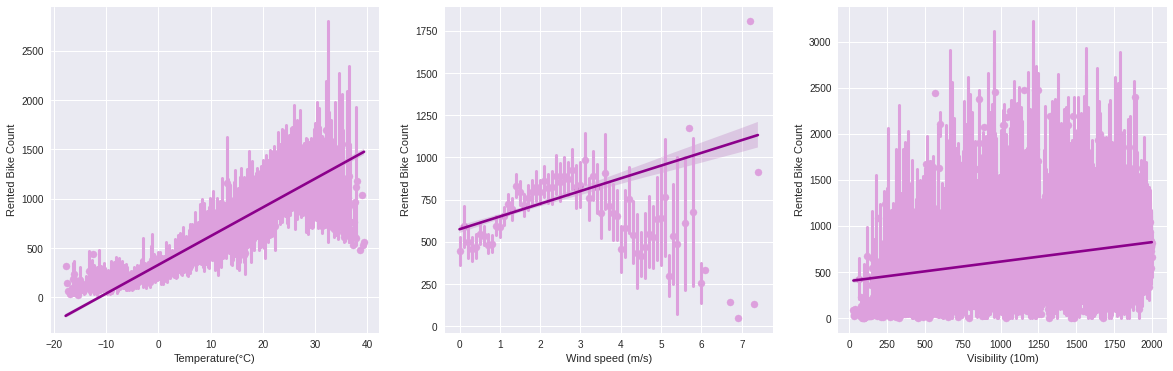

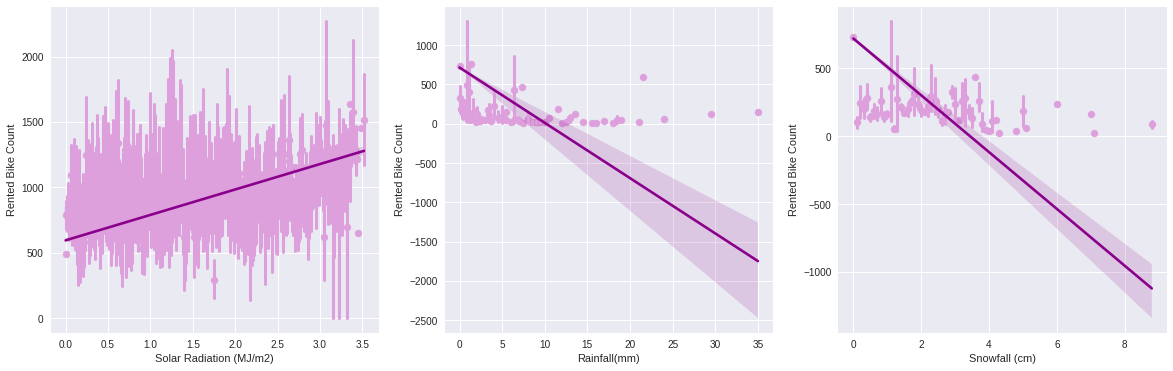

In [46]:
#plotting regression plots for different variables 

fig, axs= plt.subplots(1,3,figsize=(20,6))
regplot('Temperature(°C)',0)
regplot('Wind speed (m/s)',1)
regplot('Visibility (10m)',2)
fig, axs= plt.subplots(1,3,figsize=(20,6))
regplot('Solar Radiation (MJ/m2)',0)
regplot('Rainfall(mm)',1)
regplot('Snowfall (cm)',2)


# **ML Models Implementation**

## **Linear Regression Model**

In [47]:
# new set of independent variables as some columsn are dropped

independent_variables = ['Hour', 'Temperature(°C)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
       'Holiday', 'month','weekday']
sqrt_transform = np.sqrt(data[dependent_variables])  
#splitting data into train and test data   
X_train, X_test, y_train, y_test = train_test_split(data[independent_variables], sqrt_transform, test_size = 0.2, random_state = 0)

In [48]:
#shape of training data
X_train.shape

(7008, 10)

In [49]:
#shape of test data
X_test.shape

(1752, 10)

In [50]:
#defining and fitting linear regression model

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [51]:
# predicting train target variable and test target variable both using linear regression model

y_predicted = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [52]:
regressor.coef_

array([[ 5.55892083e-01,  4.86850498e-01,  1.20345163e-01,
         2.37084668e-03,  8.44212159e-01, -1.78985779e+00,
        -9.35023469e-01, -4.03027975e+00,  1.16538462e-01,
        -1.60495709e-01]])

In [53]:
regressor.intercept_

array([7.06572222])

In [54]:
#defining function to print metrics for evaluation of models 
adjusted_r2_list = []
MSE_list = []
RMSE_list = []
MAE_list = []
R2_square_list = []
def print_metrics(actual, predicted,independent_variables):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 square is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adjusted R2 score is{}'.format(adjusted_r2(len(actual),len(independent_variables), actual, predicted) ))
  adjusted_r2_list.append(adjusted_r2(len(actual),len(independent_variables), actual, predicted))
  MSE_list.append(mean_squared_error(actual, predicted))
  RMSE_list.append(math.sqrt(mean_squared_error(actual, predicted)))
  MAE_list.append(mean_absolute_error(actual, predicted))
  R2_square_list.append(r2_score(actual, predicted))


def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))  
  

In [55]:
# checking mean squared error, root mean squared error, R2 square , mean absolute error and adjusted R2 score for train and test data both

print("Evaluation metrics for training data")
print("--------------------------------------")
print_metrics(y_train,y_train_pred,independent_variables)
print("--------------------------------------")
print("--------------------------------------")
print("Evaluation metrics for test data")
print("--------------------------------------")
print_metrics(y_test, y_predicted,independent_variables)


Evaluation metrics for training data
--------------------------------------
MSE is 82.54262440299172
RMSE is 9.085297155459017
R2 square is 0.4651658504428887
MAE is 6.714158886558394
Adjusted R2 score is0.4644014740679321
--------------------------------------
--------------------------------------
Evaluation metrics for test data
--------------------------------------
MSE is 89.75365590130693
RMSE is 9.473840609874484
R2 square is 0.43008578964332533
MAE is 6.967849529253252
Adjusted R2 score is0.42681230193306297


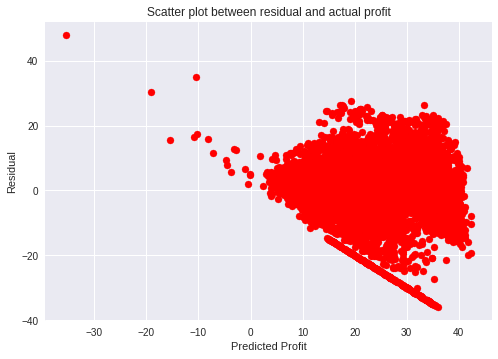

In [56]:
# plotting graph to see residual and actual profit 

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_predicted
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

## **Polynomial regression Model**

**Polynomial Regression is a special case of linear regression where  the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial.**

**Checking whether polynomial regression improves the results and gives better evaluation metrics**

In [62]:
# transforming training data as per degree two polynomial  regression model

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_train_poly, y_train)

LinearRegression()

In [63]:
#Evaluation metrics for polynomial regression model

X_train_poly = poly.fit_transform(X_train)
y_predicted = lin2.predict(X_train_poly)
print("Evaluation metric for training data")
print("-----------------------------------")
print_metrics(y_train,y_predicted,independent_variables)

print("-----------------------------------")
print("-----------------------------------")
print("Evaluation metric for testing data")
print("-----------------------------------")
X_test_poly = poly.fit_transform(X_test)
y_predicted = lin2.predict(X_test_poly)
print_metrics(y_test,y_predicted,independent_variables)


Evaluation metric for training data
-----------------------------------
MSE is 69.15939833595111
RMSE is 8.316212980434731
R2 square is 0.5518823364241219
MAE is 5.9847987628546795
Adjusted R2 score is0.5512418938579137
-----------------------------------
-----------------------------------
Evaluation metric for testing data
-----------------------------------
MSE is 78.4882252924261
RMSE is 8.85935806322479
R2 square is 0.501618574857646
MAE is 6.281442419541594
Adjusted R2 score is0.49875595897515124


## **Decision Tree Model**

In [64]:
# Again including all the columns for decision tree regressor

independent_variables = ['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 
                         'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'month','weekday']
                         
#splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(data_copy[independent_variables],data_copy[dependent_variables], test_size = 0.2, random_state = 0)


In [65]:
# Decision tree regressor to fit training data

reg = DecisionTreeRegressor(criterion='mse',min_samples_split=5,min_samples_leaf=2, random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [66]:
# Visualization of how decision tree is implemented for this data

graph = Source(tree.export_graphviz(reg, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

Feature: 0, Score: 0.28916
Feature: 1, Score: 0.32867
Feature: 2, Score: 0.08967
Feature: 3, Score: 0.00834
Feature: 4, Score: 0.00747
Feature: 5, Score: 0.02557
Feature: 6, Score: 0.07266
Feature: 7, Score: 0.01785
Feature: 8, Score: 0.00079
Feature: 9, Score: 0.01341
Feature: 10, Score: 0.00424
Feature: 11, Score: 0.07979
Feature: 12, Score: 0.02167
Feature: 13, Score: 0.04070


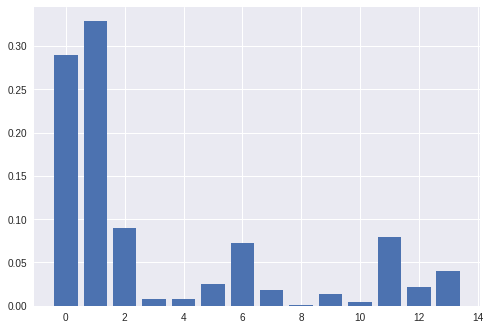

In [67]:
#impact of different features on the predicted value in decision tree model implementation

importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Hour and Temperature are having larger impact. Other features contribution is also visible fron the graph plotted above**

In [68]:
#Evaluation metrics for decsision tree regression model

y_predicted_train = reg.predict(X_train)
print("Evaluation metric for training data")
print("-----------------------------------")
print_metrics(y_train,y_predicted_train,independent_variables)

print("-----------------------------------")
print("-----------------------------------")
print("Evaluation metric for testing data")
print("-----------------------------------")

y_predicted_test = reg.predict(X_test)
print_metrics(y_test,y_predicted_test,independent_variables)

Evaluation metric for training data
-----------------------------------
MSE is 5667.104023972603
RMSE is 75.28017019091152
R2 square is 0.9863523196242828
MAE is 38.87678367579909
Adjusted R2 score is0.986324996940848
-----------------------------------
-----------------------------------
Evaluation metric for testing data
-----------------------------------
MSE is 52755.21314133054
RMSE is 229.68503029438062
R2 square is 0.8739489466120322
MAE is 131.53125
Adjusted R2 score is0.8729329910867405


**We are getting very high R2 score and adjusted R2 score values. It can be due to overfitting. Grid search CV can be used for hyperparameter tuning to handle overfitting issues.**




In [69]:
# Decision tree model using grid search cv to choose best hyperparameters

g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid={'min_samples_split': range(2, 10),'max_depth':range(7,12), 'max_features':range(5,11)},cv=5, refit=True)
g_cv.fit(X_train, y_train)
g_cv.best_params_
result = g_cv.cv_results_

Feature: 0, Score: 0.28233
Feature: 1, Score: 0.34606
Feature: 2, Score: 0.09697
Feature: 3, Score: 0.00321
Feature: 4, Score: 0.00415
Feature: 5, Score: 0.02088
Feature: 6, Score: 0.07751
Feature: 7, Score: 0.01524
Feature: 8, Score: 0.00079
Feature: 9, Score: 0.01571
Feature: 10, Score: 0.00244
Feature: 11, Score: 0.08176
Feature: 12, Score: 0.01909
Feature: 13, Score: 0.03387


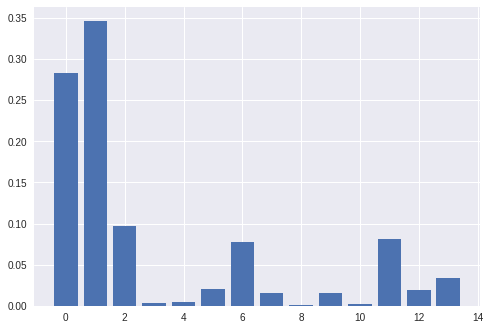

In [70]:
# Feature importances 

importance = g_cv.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Hour and Temperature and having larger impact. Other features contribution is also visible fron the graph plotted above**



In [71]:
# Evaluation metric for decision tree model after hyperparameter tuning
print("Evaluation metric for training data")
print("-----------------------------------")
print_metrics(y_train,g_cv.predict(X_train),independent_variables) 
print("-----------------------------------")
print("-----------------------------------")
print("Evaluation metric for testing data")
print("-----------------------------------")
print_metrics(y_test,g_cv.predict(X_test),independent_variables) 

Evaluation metric for training data
-----------------------------------
MSE is 31646.54162407452
RMSE is 177.8947487254037
R2 square is 0.9237879023827347
MAE is 101.86720118217991
Adjusted R2 score is0.9236353256107281
-----------------------------------
-----------------------------------
Evaluation metric for testing data
-----------------------------------
MSE is 62723.35632312354
RMSE is 250.44631425342146
R2 square is 0.8501314909793355
MAE is 148.21241472517943
Adjusted R2 score is0.8489235697782478


Text(0.5, 1.0, 'Actual Vs Predicted Rented Bike count values')

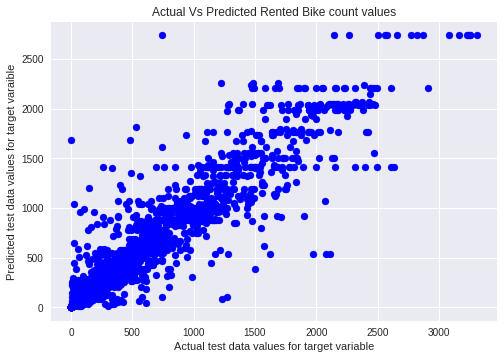

In [72]:
#scatter plot to compare test prediction and actual results

plt.scatter(y_test,g_cv.best_estimator_.predict(X_test),color='blue',label='Test Data Estimates')
plt.xlabel("Actual test data values for target variable")
plt.ylabel("Predicted test data values for target varaible")
plt.title("Actual Vs Predicted Rented Bike count values")

## **KNN Regressor Model**

In [73]:
# using min max scaler for scaling data to implement KNN regressor Model

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [74]:
#to store rmse values for different k, creating array named rmse_val

rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled_df, y_train)  #fit the model
    pred=model.predict(X_test_scaled_df ) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 317.06746595643733
RMSE value for k=  2 is: 280.60431107696326
RMSE value for k=  3 is: 278.49718686611345
RMSE value for k=  4 is: 279.0030025047725
RMSE value for k=  5 is: 281.38439015487523
RMSE value for k=  6 is: 287.22497665525515
RMSE value for k=  7 is: 287.8924382374701
RMSE value for k=  8 is: 291.8212316825184
RMSE value for k=  9 is: 291.48929809020746
RMSE value for k=  10 is: 293.50630007707076
RMSE value for k=  11 is: 294.85299512230443
RMSE value for k=  12 is: 296.1884971304288
RMSE value for k=  13 is: 299.0198746111117
RMSE value for k=  14 is: 301.28979777977764
RMSE value for k=  15 is: 303.2028887148219
RMSE value for k=  16 is: 305.57498100647155
RMSE value for k=  17 is: 307.7815177467498
RMSE value for k=  18 is: 309.91741995023426
RMSE value for k=  19 is: 312.0371780211013
RMSE value for k=  20 is: 314.4436550940109


**Using Grid Search CV for hyperparameter tuning of KNN Regressor Model**

In [75]:
# defining dictionary to store different hyperparameter values 

k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)


In [76]:
# Implementation of KNN Regressor after hyperparameter tuning

knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, param_grid, cv=10)
model.fit(X_train_scaled_df,y_train)
model.best_params_


{'n_neighbors': 5, 'weights': 'distance'}

In [77]:
# Evaluation metric for KNN Regressor Model

y_predicted_train = model.predict(X_train_scaled_df)
y_predicted = model.predict(X_test_scaled_df)
print("Evaluation metric for training data")
print("-----------------------------------")
print_metrics(y_train,y_predicted_train,independent_variables)
print("-----------------------------------")
print("-----------------------------------")
print("Evaluation metric for test data")
print("-----------------------------------")
print_metrics(y_test,y_predicted,independent_variables)

Evaluation metric for training data
-----------------------------------
MSE is 0.0
RMSE is 0.0
R2 square is 1.0
MAE is 0.0
Adjusted R2 score is1.0
-----------------------------------
-----------------------------------
Evaluation metric for test data
-----------------------------------
MSE is 73199.23857056774
RMSE is 270.55357800363265
R2 square is 0.8251008653059814
MAE is 163.76097089242106
Adjusted R2 score is0.8236912004322242


## **Random Forest Model**

In [78]:
# storing different values for hyperparameter tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


In [79]:
# Random Forest regressor implementation

rf = RandomForestRegressor()
# Instantiate the grid search model
model = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
model.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [80]:
#Evaluation metric for Random Forest Regressor Model

y_predict_train = model.predict(X_train)
y_predict = model.predict(X_test)
print("Evaluation metric for training data")
print("-----------------------------------")
print_metrics(y_train,y_predict_train,independent_variables)
print("-----------------------------------")
print("-----------------------------------")
print("Evaluation metric for test data")
print("-----------------------------------")
print_metrics(y_test,y_predict,independent_variables)

Evaluation metric for training data
-----------------------------------
MSE is 22484.729248901658
RMSE is 149.94908885652376
R2 square is 0.9458516383631796
MAE is 96.8574986026458
Adjusted R2 score is0.9457432332347776
-----------------------------------
-----------------------------------
Evaluation metric for test data
-----------------------------------
MSE is 48107.24665634171
RMSE is 219.33364232680245
R2 square is 0.8850545992415694
MAE is 142.76350218919904
Adjusted R2 score is0.8841281538698837


## **XGB Regressor**

In [81]:

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07,0.01,0.1], #so called `eta` value
              'max_depth': [4,5],
              'subsample': [0.7,0.8,0.9,1],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 40 candidates, totalling 80 fits
[18:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9304705796864723
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.9}


In [82]:
y_predict_train = xgb_grid.best_estimator_.predict(X_train)
y_predict_test = xgb_grid.best_estimator_.predict(X_test)
print("Evaluation metric for training data")
print("-----------------------------------")
print_metrics(y_train,y_predict_train,independent_variables)
print("-----------------------------------")
print("-----------------------------------")
print("Evaluation metric for testing data")
print("-----------------------------------")
print_metrics(y_test,y_predict_test,independent_variables)

Evaluation metric for training data
-----------------------------------
MSE is 8028.853311451494
RMSE is 89.60386884198412
R2 square is 0.9806646881167718
MAE is 59.030774724563436
Adjusted R2 score is0.9806259787836722
-----------------------------------
-----------------------------------
Evaluation metric for testing data
-----------------------------------
MSE is 25350.051165979992
RMSE is 159.21699396100905
R2 square is 0.9394296703085964
MAE is 97.85649094004269
Adjusted R2 score is0.938941481122828


**Comparing Models**

In [83]:
# Let's compare adjusted R2 score values for different models. Other evaluation metrics are already mentioned along with Adjusted R2 value. here using adjusted R2 score to
# compare model performance

adjR2_train = []
adjR2_test = []
MSE_train = [] 
MSE_test =[]
RMSE_train = []
RMSE_test=[]
MAE_train = []
MAE_test = []
R2_square_train =[]
R2_square_test = []

for i in range(0,14,2):
  adjR2_train.append(adjusted_r2_list[i])
  MSE_train.append(MSE_list[i])
  RMSE_train.append(RMSE_list[i])
  MAE_train.append(MAE_list[i])
  R2_square_train.append(R2_square_list[i])
  
for i in range(1,14,2):
  adjR2_test.append(adjusted_r2_list[i])
  MSE_test.append(MSE_list[i]) 
  RMSE_test.append(RMSE_list[i]) 
  MAE_test.append(MAE_list[i]) 
  R2_square_test.append(R2_square_list[i])       

modelnames = ['Linear Regression Model' ,'Polynomial Regression','Decision Tree Regression','Decision Tree with hyperparameter tuning','KNN Model','Random Forest Regression','XG Boost Regressor']
details ={
    'Model' : modelnames,
    'Adj. R2 Score (training data)' : adjR2_train ,
    'Adj. R2 Score (test data)' : adjR2_test, 'MSE (train data)':MSE_train, 'MSE (test data)':MSE_test,'RMSE(train data)':RMSE_train,'RMSE(test data)':RMSE_test,
    'MAE(train data)':MAE_train,'MAE(test data)':MAE_test,'R2 Square (train data)':R2_square_train, 'R2 Square (test data)':R2_square_test
}

#creating dataframe to store details
df = pd.DataFrame(details)   

In [84]:
# dataframe containing evaluation metric values for different models
df

Model  Adj. R2 Score (training data)  \
0                   Linear Regression Model                       0.464401   
1                     Polynomial Regression                       0.464396   
2                  Decision Tree Regression                       0.464401   
3  Decision Tree with hyperparameter tuning                       0.551242   
4                                 KNN Model                       0.986325   
5                  Random Forest Regression                       0.923635   
6                        XG Boost Regressor                       1.000000   

   Adj. R2 Score (test data)  MSE (train data)  MSE (test data)  \
0                   0.426812         82.542624        89.753656   
1                   0.426853         82.543407        89.747356   
2                   0.426812         82.542624        89.753636   
3                   0.498756         69.159398        78.488225   
4                   0.872933       5667.104024     52755.213141   
5                   0.848924      31646.541624     62723.356323   
6                   0.823691          0.000000     73199.238571   

   RMSE(train data)  RMSE(test data)  MAE(train data)  MAE(test data)  \
0          9.085297         9.473841         6.714159        6.967850   
1          9.085340         9.473508         6.714821        6.968800   
2          9.085297         9.473840         6.714161        6.967853   
3          8.316213         8.859358         5.984799        6.281442   
4         75.280170       229.685030        38.876784      131.531250   
5        177.894749       250.446314       101.867201      148.212415   
6          0.000000       270.553578         0.000000      163.760971   

   R2 Square (train data)  R2 Square (test data)  
0                0.465166               0.430086  
1                0.465161               0.430126  
2                0.465166               0.430086  
3                0.551882               0.501619  
4                0.986352               0.873949  
5                0.923788               0.850131  
6                1.000000               0.825101

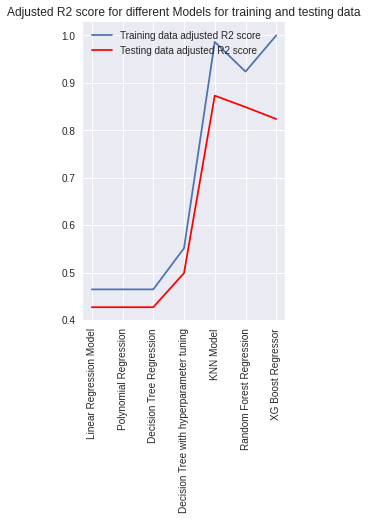

In [85]:
#Plotting graphs for Adjusted R2 score and R2 score for different models comparison

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.subplot(1, 2, 1)
plt.plot(df['Model'],df['Adj. R2 Score (training data)'])
plt.plot(df['Model'],df['Adj. R2 Score (test data)'],color='red')
plt.xticks(df['Model'], [str(i) for i in df['Model']], rotation=90)
plt.title("Adjusted R2 score for different Models for training and testing data")
plt.legend(['Training data adjusted R2 score', 'Testing data adjusted R2 score'])





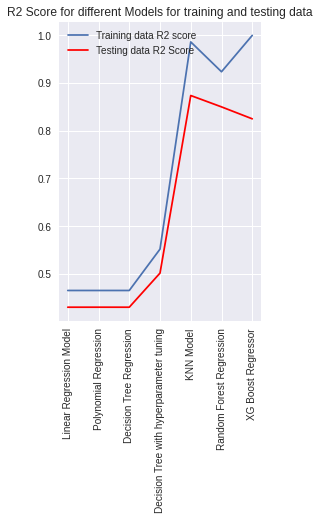

In [86]:
plt.subplot(1, 2, 1)


plt.plot(df['Model'],df['R2 Square (train data)'])
plt.plot(df['Model'],df['R2 Square (test data)'],color='red')
plt.xticks(df['Model'], [str(i) for i in df['Model']], rotation=90)
plt.title("R2 Score for different Models for training and testing data")
plt.legend(['Training data R2 score ', 'Testing data R2 Score'])

**Adjusted R2 score value for training data is maximum infact it is 1 for KNN regressor Model**

**Adjusted R2 score value for test data is maximum for XG Boost Regressor Model**

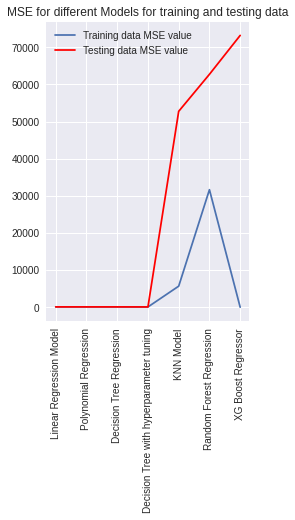

In [87]:
# graphs for comparing mean squared error for different models

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.subplot(1, 2, 1)
plt.plot(df['Model'],df['MSE (train data)'])
plt.plot(df['Model'],df['MSE (test data)'],color='red')
plt.xticks(df['Model'], [str(i) for i in df['Model']], rotation=90)
plt.title("MSE for different Models for training and testing data")
plt.legend(['Training data MSE value', 'Testing data MSE value'])




**All metrics were evaluated for each model, MSE(Mean Squared Error), MAE (Mean Absolute Error), RMSE(Root Mean squared Error),R2 Score, Adjusted R2 Score**

**At the end, comparison of models stated that some models showed improvement or were able to handle the overfitting issues when hyperparameter tuning was performed.**

**Adjusted R2 score was used to compare models as it is a special form of R2 score. Adjusted R2 indicates how well terms fit a curve or line, and also adjusts for the number of terms in a model.** 

**If only adjusted R2 score is considered, then XG Boost regressor performed much better in test data as compared to other models**